# 📊 Baseline Model Comparison (Simple Models)

In this notebook, we compare the performance of:
- Dummy Regressor
- Ridge Regression
- Elastic Net

Metrics used: **RMSE** and **R²**, evaluated via 5-fold cross-validation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NUM_PCS = 30  # Number of principal components

# Load each model's summary
dummy = pd.read_csv(f"results/dummy_regressor/dummy_regressor_results_{NUM_PCS}_pcs.csv").assign(Model="Dummy")
ridge = pd.read_csv(f"results/ridge_regression/ridge_regression_results_{NUM_PCS}_pcs.csv").assign(Model="Ridge")
elastic = pd.read_csv(f"results/elastic_net/voom_{NUM_PCS}_pcs.csv").assign(Model="ElasticNet")

# Standardize column names if needed
for df in [dummy, ridge, elastic]:
    df.rename(columns=lambda c: c.strip().replace("²", "^2"), inplace=True)

# Combine all results
baseline_df = pd.concat([dummy, ridge, elastic], ignore_index=True)
print("✅ Combined shape:", baseline_df.shape)
baseline_df.head()


✅ Combined shape: (2091, 9)


,DRUG_ID,rmse_mean,rmse_std,r2_mean,r2_std,Model,n_samples,alpha,l1_ratio
0,1,1.108986,0.171402,-0.036364,0.032988,Dummy,NaN,NaN,NaN
1,3,2.003308,0.114150,-0.008861,0.012807,Dummy,NaN,NaN,NaN
2,5,1.650569,0.192533,-0.034595,0.036549,Dummy,NaN,NaN,NaN
3,6,0.887511,0.126332,-0.020691,0.029201,Dummy,NaN,NaN,NaN
4,9,1.462640,0.060871,-0.002795,0.002771,Dummy,NaN,NaN,NaN


In [2]:
# Filter out extreme RMSE > 3.5 and R² < -1
filtered_baseline_df = baseline_df[
    (baseline_df["rmse_mean"] <= 3.5) &
    (baseline_df["r2_mean"] >= -1)
].copy()

print(f"🧼 Filtered dataset shape: {filtered_baseline_df.shape}")


🧼 Filtered dataset shape: (2091, 9)


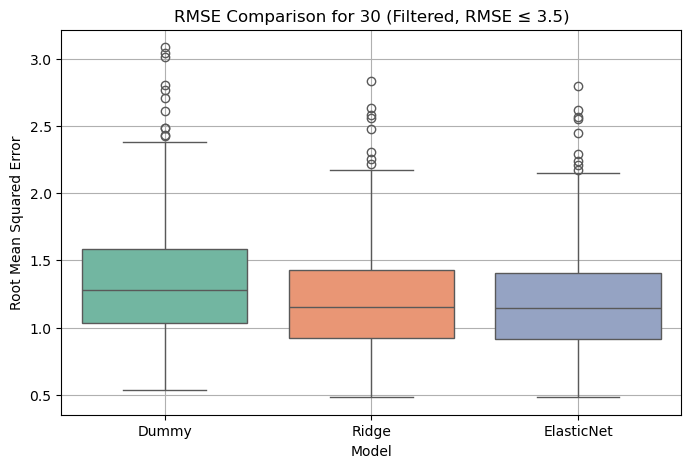

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_baseline_df, x="Model", y="rmse_mean", hue="Model", legend=False, palette="Set2")
plt.title(f"RMSE Comparison for {NUM_PCS} (Filtered, RMSE ≤ 3.5)")
plt.ylabel("Root Mean Squared Error")
plt.grid(True)
plt.savefig(f"results/rmse_comparison_{NUM_PCS}_pcs.png", dpi=300)
plt.show()
plt.close()

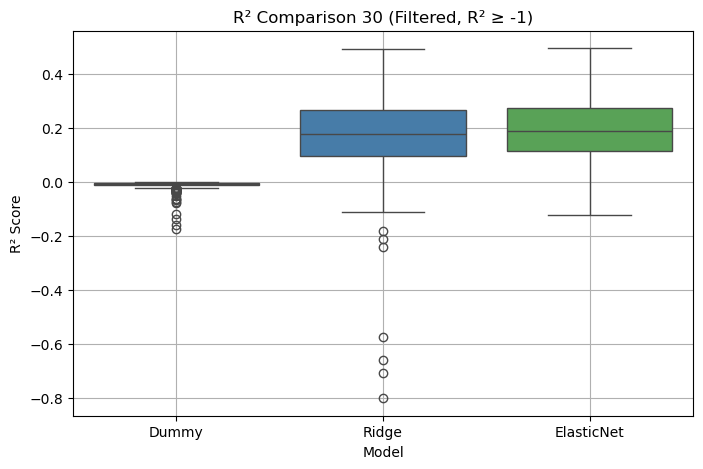

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_baseline_df, x="Model", y="r2_mean", hue="Model", legend=False, palette="Set1")
plt.title(f"R² Comparison {NUM_PCS} (Filtered, R² ≥ -1)")
plt.ylabel("R² Score")
plt.grid(True)
plt.savefig(f"results/r2_comparison_{NUM_PCS}_pcs.png", dpi=300)
plt.show()
plt.close()

### 📌 Summary Statistics (Simple Models)


In [5]:
filtered_baseline_df.groupby("Model")[["rmse_mean", "r2_mean"]].agg(["mean", "std", "median"]).round(4)


rmse_mean                 r2_mean                
                mean     std  median    mean     std  median
Model                                                       
Dummy         1.3441  0.4203  1.2825 -0.0102  0.0138 -0.0074
ElasticNet    1.1901  0.3607  1.1465  0.1953  0.1046  0.1884
Ridge         1.2015  0.3645  1.1567  0.1765  0.1299  0.1768